<a href="https://colab.research.google.com/github/dakshagarwal76/electrical-grid-predictor/blob/main/grid_stability_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Data handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve

# Metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, mean_squared_error, r2_score
)

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [39]:
df = pd.read_csv('/content/Data_for_UCI_named.csv')

In [40]:
label_enc = LabelEncoder()
df['stabf'] = label_enc.fit_transform(df['stabf'])

In [41]:
X = df.drop(columns=['stab', 'stabf'])
y_class = df['stabf']
y_regr = df['stab']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_scaled, y_regr, test_size=0.2, random_state=42)

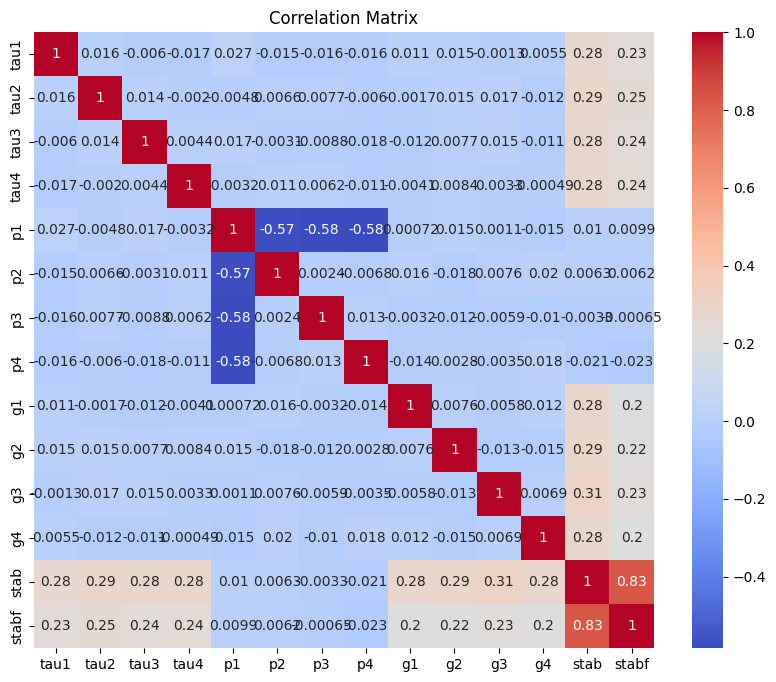

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [45]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier()
}

=== Classification Results ===

------------------------------------------------------------
Model: Logistic Regression
------------------------------------------------------------

Accuracy:              0.8160

Confusion Matrix:
[[ 498  195]
 [ 173 1134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       693
           1       0.85      0.87      0.86      1307

    accuracy                           0.82      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.81      0.82      0.82      2000
 

Cross-Validation Score: 0.8158

ROC AUC: 0.8897953190225569 



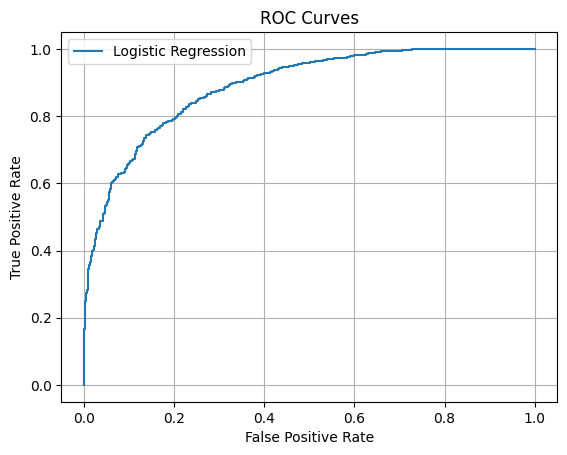


------------------------------------------------------------
Model: Random Forest
------------------------------------------------------------

Accuracy:              0.9140

Confusion Matrix:
[[ 598   95]
 [  77 1230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       693
           1       0.93      0.94      0.93      1307

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.91      0.91      2000
 

Cross-Validation Score: 0.9215

ROC AUC: 0.9730146585540618 



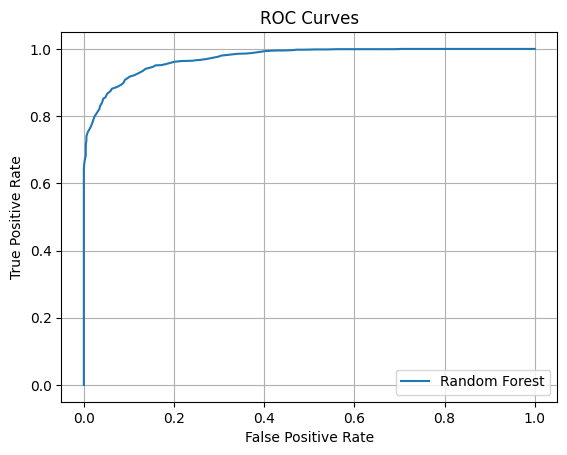


------------------------------------------------------------
Model: Gradient Boosting
------------------------------------------------------------

Accuracy:              0.9080

Confusion Matrix:
[[ 579  114]
 [  70 1237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       693
           1       0.92      0.95      0.93      1307

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000
 

Cross-Validation Score: 0.9215

ROC AUC: 0.9710395020264952 



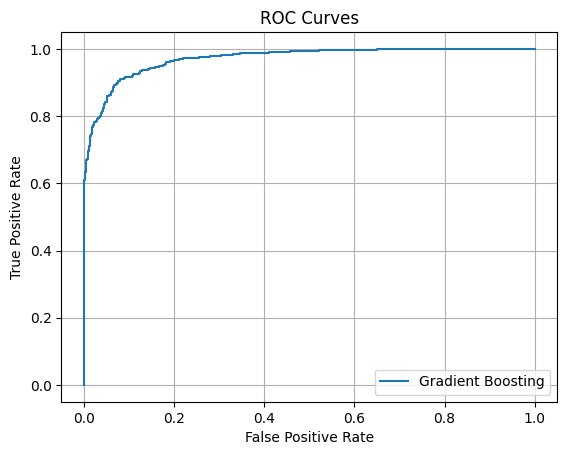


------------------------------------------------------------
Model: AdaBoost
------------------------------------------------------------

Accuracy:              0.8365

Confusion Matrix:
[[ 508  185]
 [ 142 1165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       693
           1       0.86      0.89      0.88      1307

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.82      2000
weighted avg       0.83      0.84      0.84      2000
 

Cross-Validation Score: 0.8415

ROC AUC: 0.9189639315882621 



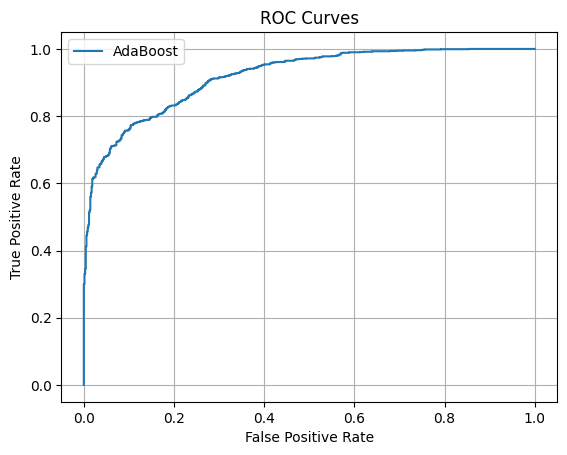


------------------------------------------------------------
Model: KNN
------------------------------------------------------------

Accuracy:              0.8525

Confusion Matrix:
[[ 496  197]
 [  98 1209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       693
           1       0.86      0.93      0.89      1307

    accuracy                           0.85      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.85      0.85      0.85      2000
 

Cross-Validation Score: 0.8555

ROC AUC: 0.9180895190841634 



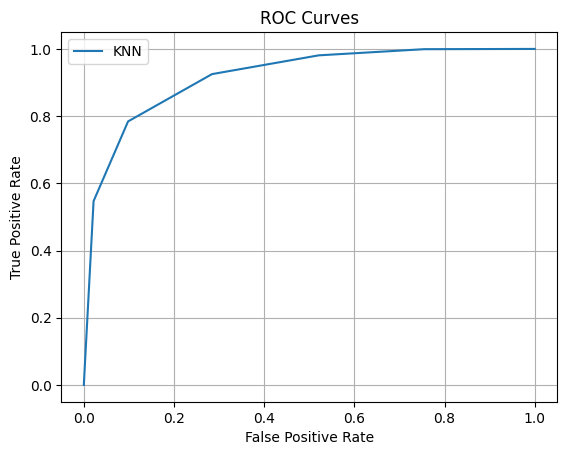

In [46]:
print("=== Classification Results ===")

for name, model in classifiers.items():

    print("\n" + "-"*60)
    print(f"Model: {name}")
    print("-"*60)

    model.fit(Xc_train, yc_train)

    y_pred = model.predict(Xc_test)
    y_proba = model.predict_proba(Xc_test)[:, 1]

    accuracy = accuracy_score(yc_test, y_pred)
    print(f"\nAccuracy:              {accuracy:.4f}")

    cm = confusion_matrix(yc_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(yc_test, y_pred),"\n")

    cv_score = cross_val_score(model, X_scaled, y_class, cv=5).mean()
    print(f"Cross-Validation Score: {cv_score:.4f}\n")

    if len(np.unique(y_class)) == 2:
        print("ROC AUC:", roc_auc_score(yc_test, y_proba),"\n")
        fpr, tpr, _ = roc_curve(yc_test, y_proba)
        plt.plot(fpr, tpr, label=name)
        plt.title("ROC Curves")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.show()

In [47]:
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(Xc_train, yc_train)

print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Score for Random Forest:", grid_search_rf.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score for Random Forest: 0.9185005756500993


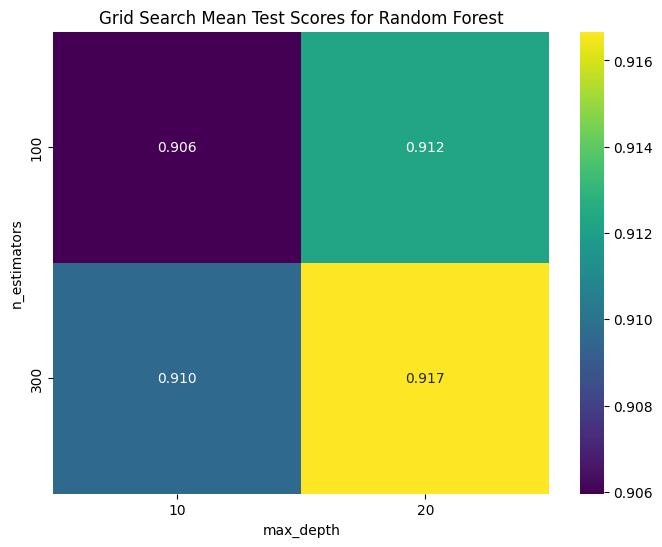

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the results from GridSearchCV
results_rf = grid_search_rf.cv_results_

# Create a DataFrame to make it easier to work with
results_df = pd.DataFrame(results_rf)

# Reshape the results to get a grid for the heatmap
mean_test_scores = results_df.pivot_table(index='param_n_estimators',
                                          columns='param_max_depth',
                                          values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores, annot=True, cmap='viridis', fmt=".3f", cbar=True)
plt.title("Grid Search Mean Test Scores for Random Forest")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.show()


In [49]:
# Gradient Boosting Model Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01,0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9],
    'min_samples_split': [2, 10]
}

gb = GradientBoostingClassifier()

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(Xc_train, yc_train)

print("\nBest Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation Score for Gradient Boosting:", grid_search_gb.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation Score for Gradient Boosting: 0.9428750138415743


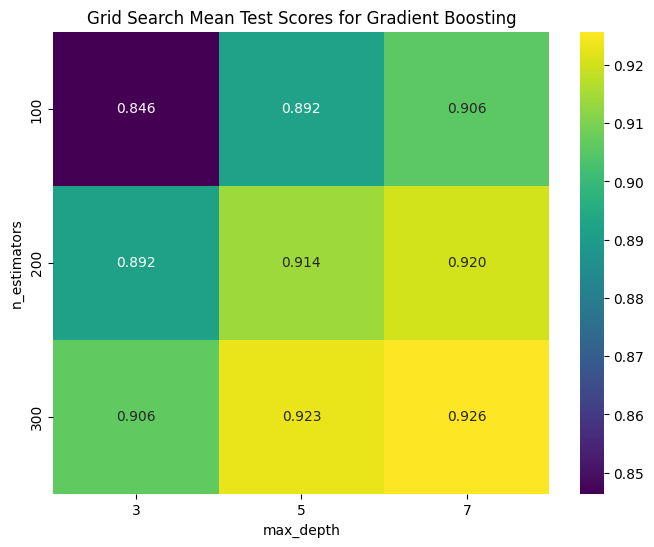

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the results from GridSearchCV for Gradient Boosting
results_gb = grid_search_gb.cv_results_

# Create a DataFrame to make it easier to work with
results_df_gb = pd.DataFrame(results_gb)

# Reshape the results to get a grid for heatmap
# Let's plot the mean test score for different combinations of `n_estimators` and `max_depth`
mean_test_scores_gb = results_df_gb.pivot_table(index='param_n_estimators',
                                                columns='param_max_depth',
                                                values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores_gb, annot=True, cmap='viridis', fmt=".3f", cbar=True)
plt.title("Grid Search Mean Test Scores for Gradient Boosting")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.show()


In [51]:
# K-Nearest Neighbors Model Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 9],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 50]
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2)
grid_search_knn.fit(Xc_train, yc_train)

print("\nBest Parameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Score for KNN:", grid_search_knn.best_score_)



Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters for KNN: {'leaf_size': 30, 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score for KNN: 0.8524994484466636


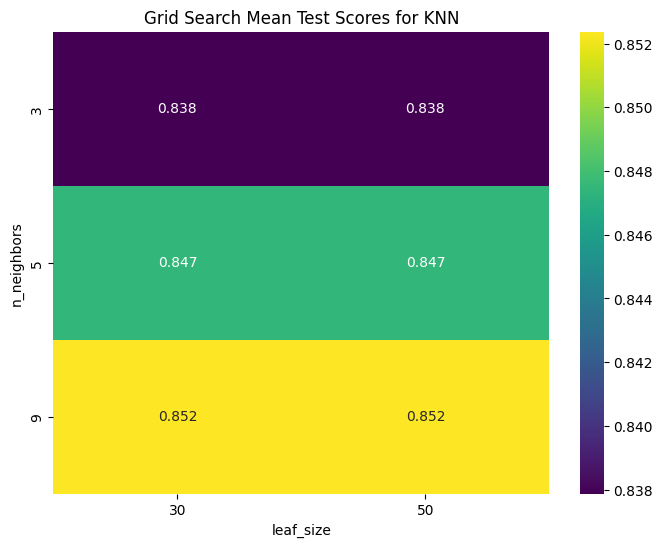

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the results from GridSearchCV for KNN
results_knn = grid_search_knn.cv_results_

# Create a DataFrame to make it easier to work with
results_df_knn = pd.DataFrame(results_knn)

# Reshape the results to get a grid for heatmap
# We will plot the mean test score for different combinations of `n_neighbors` and `leaf_size`
mean_test_scores_knn = results_df_knn.pivot_table(index='param_n_neighbors',
                                                  columns='param_leaf_size',
                                                  values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores_knn, annot=True, cmap='viridis', fmt=".3f", cbar=True)
plt.title("Grid Search Mean Test Scores for KNN")
plt.xlabel("leaf_size")
plt.ylabel("n_neighbors")
plt.show()


In [53]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=500)
}

=== Regression Results ===

------------------------------------------------------------
Model: Linear Regression
------------------------------------------------------------

Root Mean Squared Error (RMSE): 0.0220
R-squared (R²):                 0.6445
Cross-Validation R² Score:     0.6461



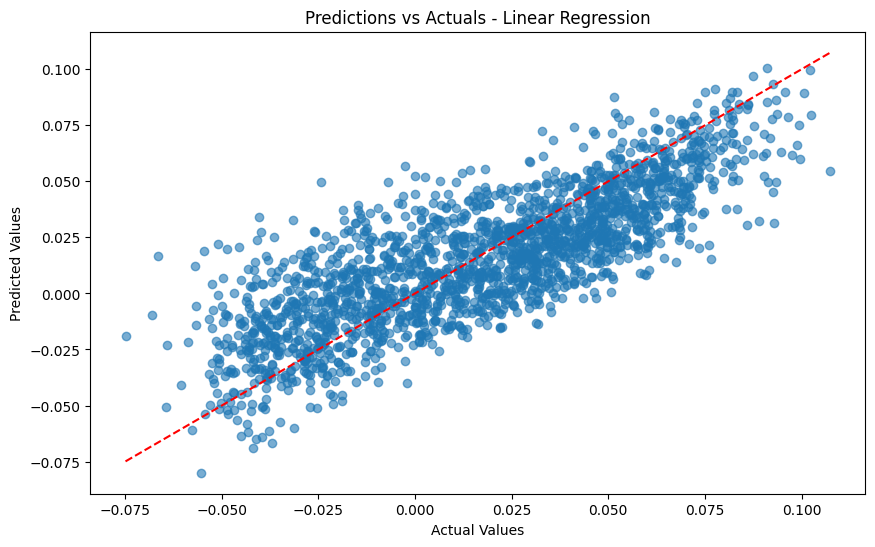


------------------------------------------------------------
Model: Random Forest
------------------------------------------------------------

Root Mean Squared Error (RMSE): 0.0121
R-squared (R²):                 0.8925
Cross-Validation R² Score:     0.8973



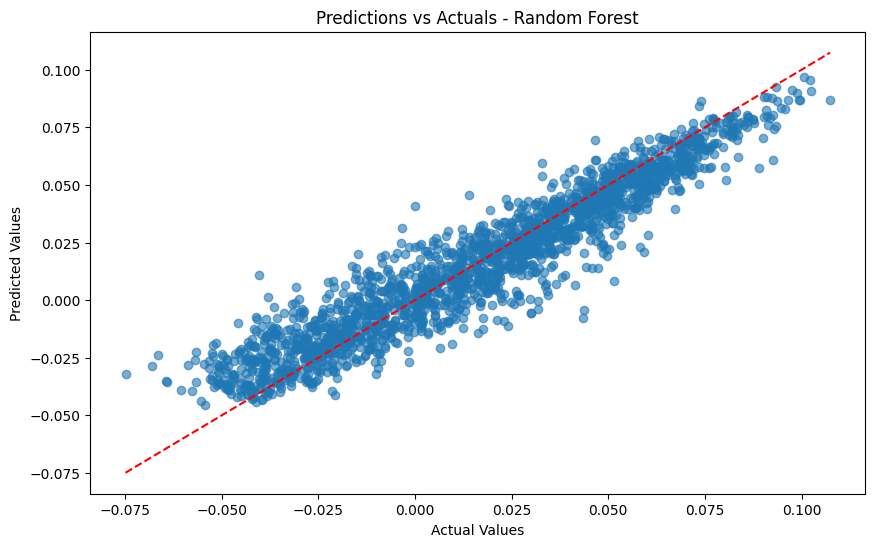

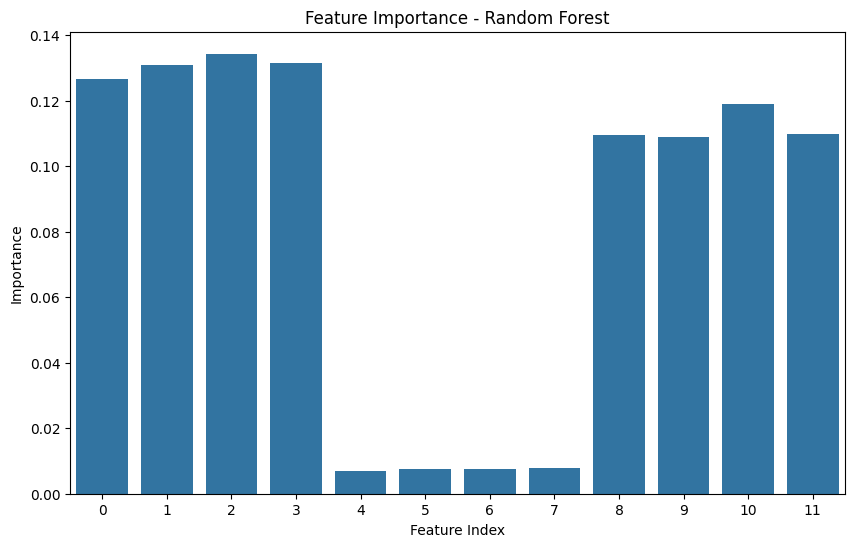


------------------------------------------------------------
Model: Gradient Boosting
------------------------------------------------------------

Root Mean Squared Error (RMSE): 0.0118
R-squared (R²):                 0.8979
Cross-Validation R² Score:     0.9057



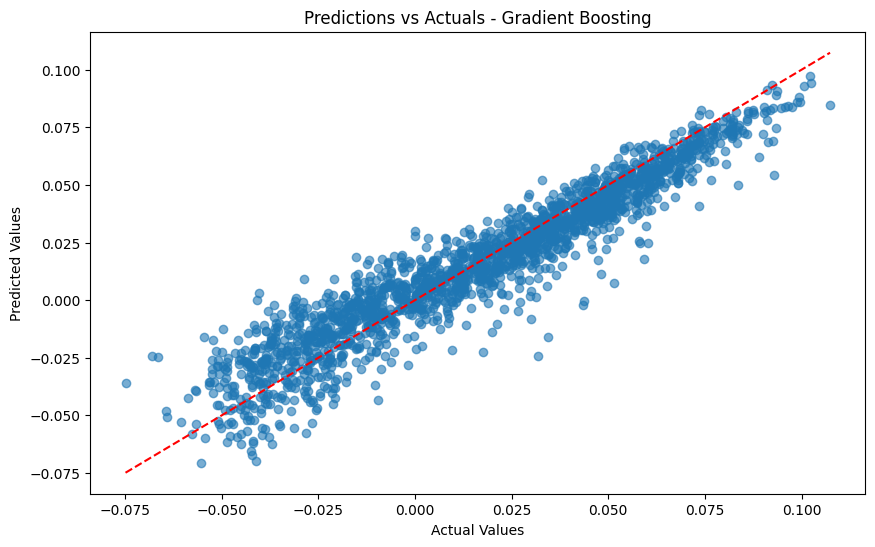

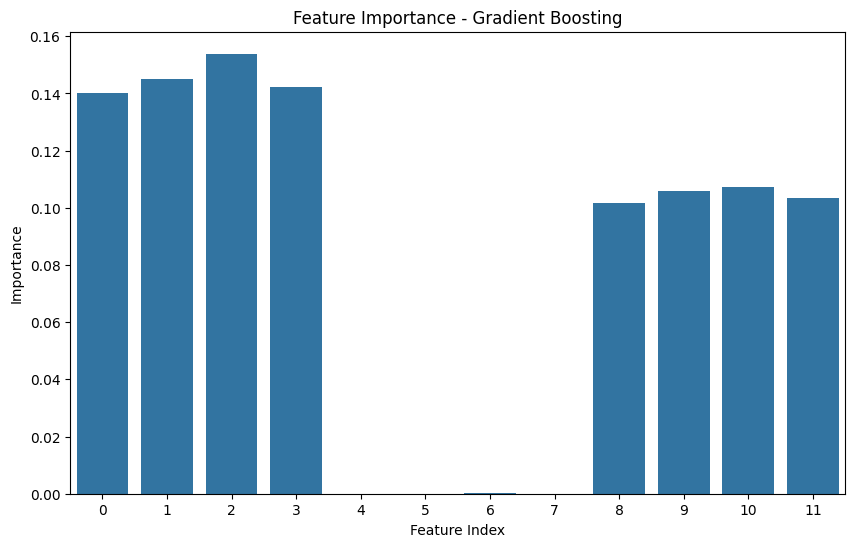


------------------------------------------------------------
Model: SVR
------------------------------------------------------------

Root Mean Squared Error (RMSE): 0.0369
R-squared (R²):                 -0.0043
Cross-Validation R² Score:     -0.0024



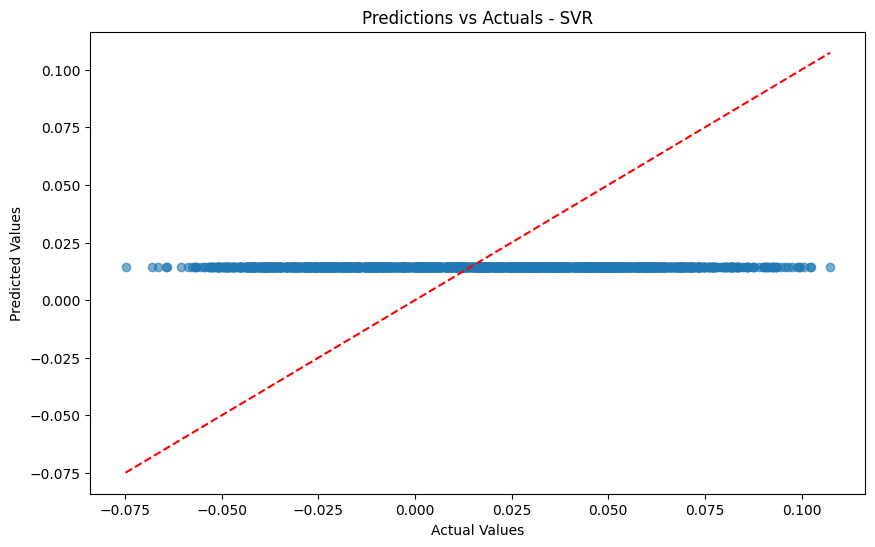


------------------------------------------------------------
Model: Neural Network
------------------------------------------------------------

Root Mean Squared Error (RMSE): 0.0329
R-squared (R²):                 0.2011
Cross-Validation R² Score:     -0.1224



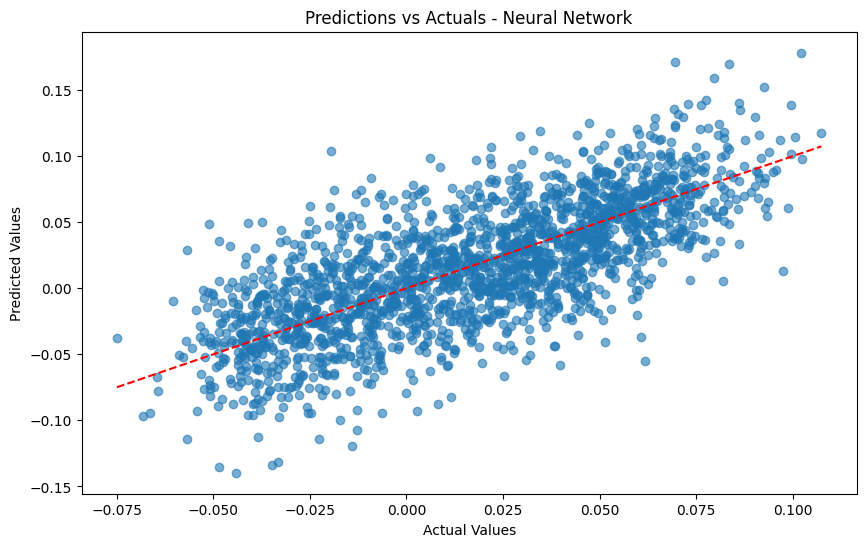

In [54]:
print("=== Regression Results ===")

for name, model in regressors.items():

    print("\n" + "-"*60)
    print(f"Model: {name}")
    print("-"*60)

    # Fit model
    model.fit(Xr_train, yr_train)

    # Predict
    preds = model.predict(Xr_test)

    # Compute metrics
    mse = mean_squared_error(yr_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(yr_test, preds)
    cv_score = cross_val_score(model, X_scaled, y_regr, cv=5, scoring='r2').mean()

    # Print performance metrics
    print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²):                 {r2:.4f}")
    print(f"Cross-Validation R² Score:     {cv_score:.4f}\n")

    # 1. Predictions vs Actuals Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(yr_test, preds, alpha=0.6)
    plt.plot([min(yr_test), max(yr_test)], [min(yr_test), max(yr_test)], color='red', linestyle='--')
    plt.title(f'Predictions vs Actuals - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # 2. Feature Importance (only for tree-based models)
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importances = model.feature_importances_
        sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
        plt.title(f'Feature Importance - {name}')
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.show()


In [55]:
# Gradient Boosting Regression
gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, gbr_params, cv=3, scoring='r2', n_jobs=-1)
gbr_grid.fit(Xr_train, yr_train)

print("Best Gradient Boosting Parameters:", gbr_grid.best_params_)
print("Best Cross-Validated R² Score:", gbr_grid.best_score_)


Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validated R² Score: 0.943070624623409


In [ ]:
# Using the best parameters for validation curve plotting
param_range = [0.01, 0.05, 0.1, 0.2, 0.3]
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(n_estimators=300, max_depth=5, subsample=0.8),
    Xr_train, yr_train,
    param_name="learning_rate",
    param_range=param_range,
    cv=3, scoring="r2"
)

# Calculate means and plot
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", marker='o')
plt.plot(param_range, test_mean, label="Validation Score", marker='s')
plt.axvline(x=0.1, color='red', linestyle='--', label='Best LR (GridSearchCV)')
plt.title("Gradient Boosting – Validation Curve (Learning Rate)")
plt.xlabel("Learning Rate")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest Regression
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(Xr_train, yr_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Cross-Validated R² Score:", rf_grid.best_score_)


In [ ]:
best_rf = rf_grid.best_estimator_
importances = best_rf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(importances)), y=importances)
plt.title("Random Forest – Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(Xr_train, yr_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Cross-Validated R² Score:", ridge_grid.best_score_)

In [ ]:
# === Ridge – Validation Curve for Alpha ===
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    Ridge(),
    Xr_train, yr_train,
    param_name="alpha",
    param_range=param_range,
    cv=5, scoring="r2"
)

# Calculate means of training and testing scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", marker='o')
plt.plot(param_range, test_mean, label="Validation Score", marker='s')

# Add a vertical line for the best alpha from GridSearchCV
best_alpha = ridge_grid.best_params_['alpha']
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best Alpha = {best_alpha}')

# Add labels and title
plt.xscale("log")
plt.title("Ridge – Validation Curve (Alpha)")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=3, scoring='r2')
lasso_grid.fit(Xr_train, yr_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Cross-Validated R² Score:", lasso_grid.best_score_)

In [ ]:
# === Lasso – Validation Curve for Alpha ===
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, test_scores = validation_curve(
    Lasso(max_iter=10000),
    Xr_train, yr_train,
    param_name="alpha",
    param_range=param_range,
    cv=5, scoring="r2"
)

# Calculate means of training and testing scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", marker='o')
plt.plot(param_range, test_mean, label="Validation Score", marker='s')

# Add a vertical line for the best alpha from GridSearchCV
best_alpha = lasso_grid.best_params_['alpha']
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best Alpha = {best_alpha}')

# Add labels and title
plt.xscale("log")
plt.title("Lasso – Validation Curve (Alpha)")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Elasticnet Regression
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],          # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],  # 0 = Ridge, 1 = Lasso
}

elastic = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2')
elastic_grid.fit(Xr_train, yr_train)

print("Best ElasticNet Parameters:", elastic_grid.best_params_)
print("Best Cross-Validated R² Score:", elastic_grid.best_score_)


In [ ]:
# Convert GridSearchCV results to DataFrame
results_df = pd.DataFrame(elastic_grid.cv_results_)

# Pivot table: Rows = l1_ratio, Columns = alpha, Values = mean test score (R²)
pivot_table = results_df.pivot_table(
    index='param_l1_ratio',
    columns='param_alpha',
    values='mean_test_score'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("ElasticNet R² Score Heatmap\n(Alpha vs L1 Ratio)")
plt.xlabel("Alpha")
plt.ylabel("L1 Ratio")
plt.tight_layout()
plt.show()